In [1]:
from StockDescription import *
from Hedge import Hedge

import sys
sys.path.append('../../source/')

import numpy as np
import pandas as pd
stockuniverse = getStockUniverse()

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import seaborn as sns
sns.set_context("poster")

/Users/haosutang/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


In [146]:
sns.set_context("talk")

In [125]:
sns.set_style('white')


In [4]:
hedge = Hedge(begindate='2005-01-01', enddate='2015-12-31')

In [95]:
hedge.portfolio = ['MSFT']

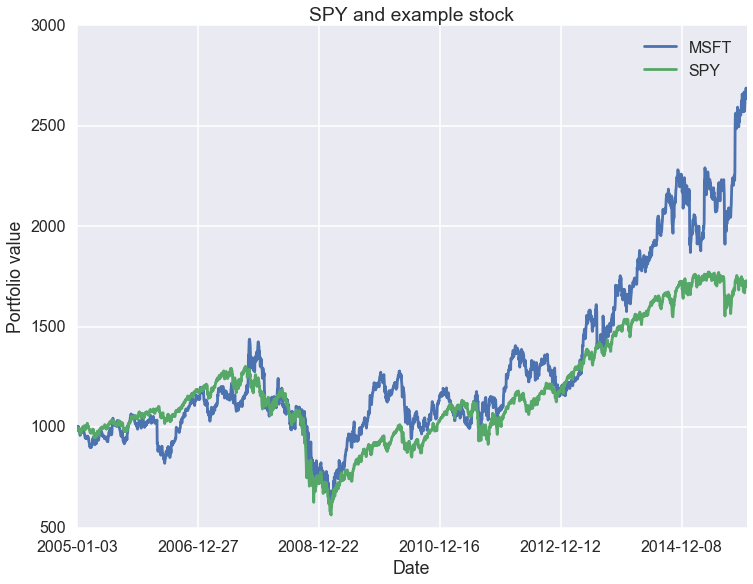

In [96]:
fig = plt.figure(figsize=(12,9))
hedge.dollar_portfolio_sum.plot(label = 'MSFT')
(hedge.spy/hedge.spy.values[0]*1000).plot(label = 'SPY')
plt.legend()
plt.title('SPY and example stock')
plt.ylabel('Portfolio value')
plt.savefig('SPY and example')

In [27]:
from BetaUtils import *

In [97]:
_, betas = get_beta(hedge.allstockdf['MSFT'].pct_change().values[1:], hedge.spy.pct_change().values[1:])

In [40]:
import datetime

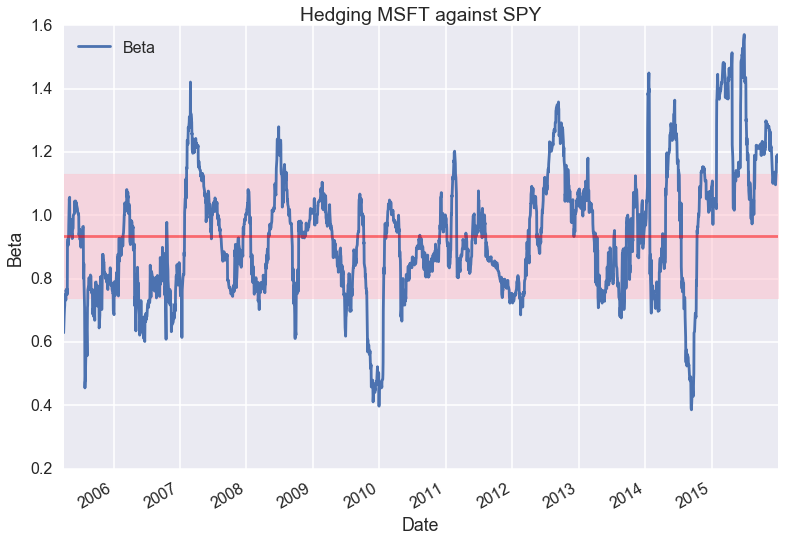

In [99]:
fig = plt.figure(figsize=(12,9))
betasdf = pd.DataFrame(betas, index=[datetime.datetime.strptime(ii, '%Y-%m-%d') for ii in hedge.spy.index[61:]])
betasdf.index.name = 'Date'
betasdf.columns = ['Beta']
betasdf.plot()
plt.axhline(betas.mean(), color='r', label = 'Mean', alpha = 0.5)
plt.fill_between(betasdf.index, betas.mean()+betas.std(), betas.mean()-betas.std(), color = 'pink', alpha = 0.5)
plt.title('Hedging MSFT against SPY')
plt.ylabel('Beta')
plt.savefig('Beta Hedging GS with SPY')

In [100]:
beta_hedged_ret = beta_hedging_ret(betas, hedge.allstockdf['MSFT'].pct_change().values[61:], hedge.spy.pct_change().values[61:])

In [101]:
np.array([hedge.allstockdf['MSFT'].pct_change().values[61:],
                   hedge.spy.pct_change().values[61:],
                   beta_hedged_ret]).shape

(3, 2708)

In [64]:
df = pd.DataFrame(beta_hedged_ret,
                  index=[datetime.datetime.strptime(ii, '%Y-%m-%d') for ii in hedge.spy.index[61:]])


In [66]:
df.columns = ['Beta Hedged']

In [102]:
df['SPY'] = hedge.spy.pct_change().values[61:]
df['MSFT'] = hedge.allstockdf['MSFT'].pct_change().values[61:]

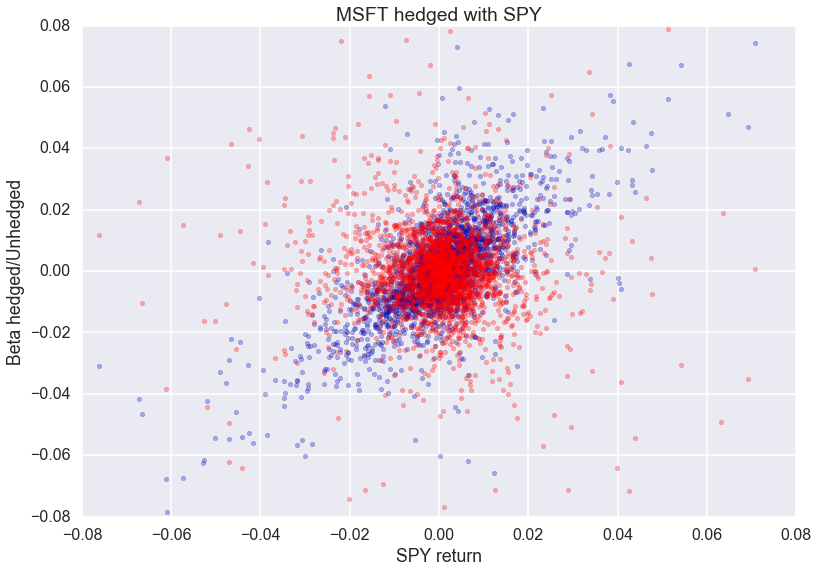

In [103]:
plt.scatter(df['SPY'].values, df['MSFT'].values, marker = 'o', alpha = 0.3, label = 'Unhedged')
plt.scatter(df['SPY'].values, df['Beta Hedged'].values, marker = 'o', alpha = 0.3, color = 'r', label = 'Hedged')
plt.xlim([-0.08, 0.08])
plt.ylim([-0.08, 0.08])
plt.xlabel('SPY return')
plt.ylabel('Beta hedged/Unhedged')
plt.title('MSFT hedged with SPY')
plt.savefig('MSFT hedged with SPY')

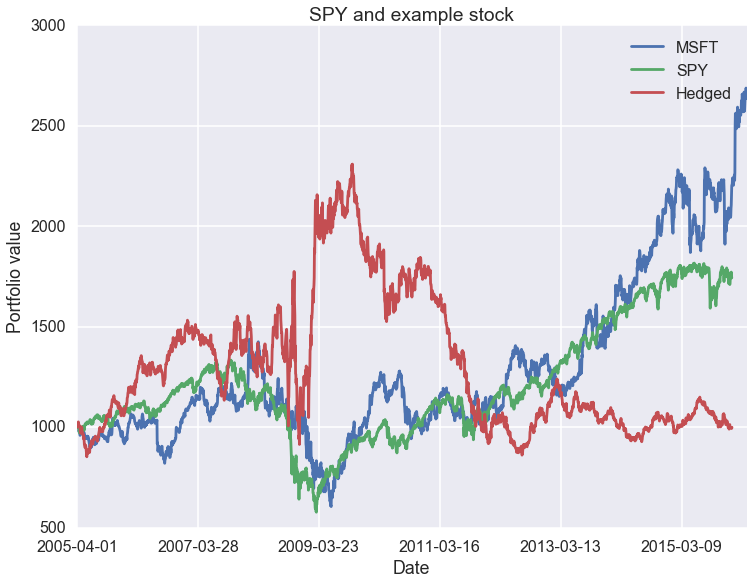

In [106]:
fig = plt.figure(figsize=(12,9))
hedge.dollar_portfolio_sum.plot(label = 'MSFT')
(hedge.spy[61:]/hedge.spy.values[61]*1000).plot(label = 'SPY')
plt.plot(np.cumprod(np.array([1]+list(df['Beta Hedged'].values+1)))*1000, label = 'Hedged')
plt.legend()
plt.title('SPY and example stock')
plt.ylabel('Portfolio value')
plt.savefig('SPY and example')

In [3]:
df2 = pd.read_table('df2')

In [4]:
df2

,market_neg_sharpe,market_correlation,market_volatility,market_neg_returns,spy_neg_sharpe,spy_correlation,spy_volatility,spy_neg_returns,unhedged_neg_sharpe,unhedged_correlation,unhedged_volatility,unhedged_neg_returns
0,-0.001022,0.037980,0.007682,0.005524,-0.079312,0.042159,0.008859,-0.184228,-0.101676,0.872340,0.018064,-0.531601
1,-0.020104,0.157284,0.007931,-0.033194,-0.075899,0.057385,0.007619,-0.150324,-0.090556,0.915506,0.018630,-0.470637
2,-0.046859,0.089002,0.008121,-0.092665,-0.121469,0.014950,0.008863,-0.302659,-0.117929,0.862156,0.017307,-0.619038
3,-0.085330,0.050464,0.008476,-0.191524,-0.144914,0.004032,0.010011,-0.428965,-0.131237,0.852228,0.018827,-0.793599
4,0.015806,0.063100,0.011612,0.061641,-0.073479,0.010638,0.011182,-0.214008,-0.097268,0.809784,0.018919,-0.527474


In [5]:
df1 = pd.read_table('df1')

In [6]:
df0 = pd.read_table('df0')

In [7]:
for df in [df0,df1,df2]:
    df['market_returns'] = -df['market_neg_returns'] 
#     df = df.drop(['market_neg_returns'],axis=1)
    df['spy_returns'] = -df['spy_neg_returns']
#     df = df.drop(['spy_neg_returns'],axis=1)
    df['unhedged_returns'] = -df['unhedged_neg_returns']
#     df = df.drop(['unhedged_neg_returns'],axis=1)

In [8]:
def display(df, year):
    for metric in ['correlation','volatility','returns']:
        market_hedged = df['market_'+metric].copy()
        spy_hedged = df['spy_'+metric].copy()
        unhedged = df['unhedged_'+metric].copy()
        
        if metric=='returns':
            market_hedged*=100
            spy_hedged*=100
            unhedged*=100

        market_mean = np.mean(market_hedged)
        spy_mean = np.mean(spy_hedged)
        un_mean = np.mean(unhedged)

        market_std = np.std(market_hedged)
        spy_std = np.std(spy_hedged)
        un_std = np.std(unhedged)

        plt.bar([0,1,2],[market_mean, spy_mean, un_mean], color=['b','g','r'],yerr=[market_std,spy_std,un_std])
        plt.xticks(np.array([0,1,2]) + 0.4, ('Market_hedged', 'SPY_hedged', 'Unhedged'), fontsize = 16)

        plt.title(str(year)+" "+metric.capitalize(), fontsize=20)
        plt.tight_layout()
        
        if metric=='correlation':
            plt.ylim((0,1))
        elif metric=='volatility':
            plt.ylim((0,0.025))
        else:
            plt.ylim((-50,80))
            
        plt.xlim((-0.1,2.9))
        
        plt.show()

In [9]:

def display2(dfs):
    colors = {'unhedged':'r', 'market':'g', 'spy':'b'}
    width = 0.25
    for metric in ['correlation','volatility','returns']:
        for i,hedge in enumerate(['market','spy','unhedged']):

        
            result7 = df0[hedge+'_'+metric].copy()
            result8 = df1[hedge+'_'+metric].copy()
            result9 = df2[hedge+'_'+metric].copy()
            
            if metric=='returns':
                result7*=100
                result8*=100
                result9*=100
            
            mean7 = np.mean(result7)
            mean8 = np.mean(result8)
            mean9 = np.mean(result9)
            
            std7 = np.std(result7)
            std8 = np.std(result8)
            std9 = np.std(result9)
            
            plt.bar(np.arange(3)+(i-1)*width+0.27,[mean7, mean8, mean9], width, color=colors[hedge],yerr=[std7,std8,std9])
        plt.xticks(np.array([0,1,2])+0.4, ('2007', '2008', '2009'), fontsize = 16)
        
        plt.xlim([-1, 3])

        plt.title(metric.capitalize(), fontsize=20)
        plt.tight_layout()
            
        if metric=='correlation':
            plt.ylim((0,1))
        elif metric=='volatility':
            plt.ylim((0,0.025))
        else:
            plt.ylim((-50,80))

        plt.xlim((-0.1,2.9))
        plt.savefig(metric)
        plt.show()

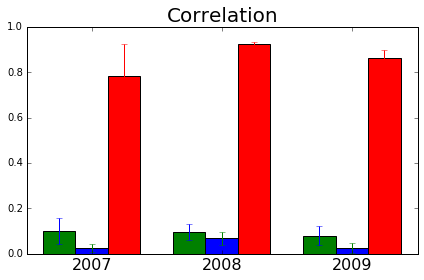

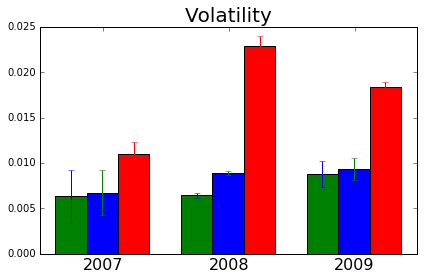

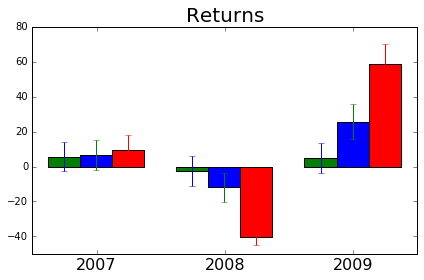

In [10]:
display2([df0,df1,df2])